# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [1]:
import random
import math
from math import cos, sin, pi
import timeit
import matplotlib.pyplot as plt

N = 100 #num of points

data_jarvis_rand = [(random.randint(0, 32767), random.randint(0, 32767)) for _ in range(N)]

# Helper function to calculate orientation
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else -1  # Clockwise or Counterclockwise

# Helper function to calculate square distance for sorting in Graham Scan
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Jarvis March Algorithm for computing Convex Hull from multiple sub-hulls
def jarvis_march(subhulls):
    if len(subhulls) < 3:
        return subhulls

    leftmost = min(subhulls, key=lambda p: p[0])
    hull = []
    p = subhulls.index(leftmost)

    while True:
        hull.append(subhulls[p])
        q = (p + 1) % len(subhulls)

        for r in range(len(subhulls)):
            if orientation(subhulls[p], subhulls[q], subhulls[r]) < 0 or \
                    (orientation(subhulls[p], subhulls[q], subhulls[r]) == 0 and \
                     distance(subhulls[p], subhulls[r]) > distance(subhulls[p], subhulls[q])):
                q = r

        p = q  # Move to the next point

        if subhulls[p] == leftmost:
            break

    return hull


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [2]:
# Graham Scan Algorithm
import math

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else -1  # Clockwise or Counterclockwise

def grahamscan(points):
    def sq_dist(p, q):
        return (p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2

    unique_input_set = list(set(points))
    start = min(unique_input_set, key=lambda point: (point[1], point[0]))
    sorted_points = sorted(unique_input_set, key=lambda point: (math.atan2(point[1] - start[1], point[0] - start[0]), sq_dist(start, point)))
    outputSet = sorted_points[:3]

    for p in sorted_points[3:]:
        while len(outputSet) > 1 and orientation(outputSet[-2], outputSet[-1], p) != -1:
            outputSet.pop()
        outputSet.append(p)

    return outputSet


Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [3]:
import math

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Colinear
    return 1 if val > 0 else -1  # Clockwise or Counterclockwise

def grahamscan(points):
    def sq_dist(p, q):
        return (p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2

    unique_input_set = list(set(points))
    start = min(unique_input_set, key=lambda point: (point[1], point[0]))
    sorted_points = sorted(unique_input_set, key=lambda point: (math.atan2(point[1] - start[1], point[0] - start[0]), sq_dist(start, point)))
    outputSet = sorted_points[:3]

    for p in sorted_points[3:]:
        while len(outputSet) > 1 and orientation(outputSet[-2], outputSet[-1], p) != -1:
            outputSet.pop()
        outputSet.append(p)

    return outputSet

def jarvis_march(subhulls):
    if len(subhulls) < 3:
        return subhulls

    leftmost = min(subhulls, key=lambda p: p[0])
    hull = []
    p = subhulls.index(leftmost)

    while True:
        hull.append(subhulls[p])
        q = (p + 1) % len(subhulls)

        for r in range(len(subhulls)):
            if orientation(subhulls[p], subhulls[q], subhulls[r]) < 0 or \
                    (orientation(subhulls[p], subhulls[q], subhulls[r]) == 0 and \
                     distance(subhulls[p], subhulls[r]) > distance(subhulls[p], subhulls[q])):
                q = r

        p = q  # Move to the next point

        if subhulls[p] == leftmost:
            break

    return hull

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def chen(points):
    if not points:
        return []  # Return an empty list if no points are provided

    # Find the point with the lowest x-coordinate (or leftmost point)
    start_point = min(points, key=lambda p: (p[0], p[1]))

    # Sort the points by their polar angle relative to the start_point
    sorted_points = sorted(points, key=lambda p: (math.atan2(p[1] - start_point[1], p[0] - start_point[0]), distance(p, start_point)))

    n = len(sorted_points)
    h = 0  # Initially h = 0
    m = 2  # Initial value of m
    ch_points = []  # Convex hull points

    while m >= h and h == 0:  # Ensure loop terminates when m reaches n
        m **= 2  # Square the value of m

        # Create groups of points with size m
        groups = [sorted_points[i:i + m] for i in range(0, n, m)]

        # Compute hull for each group using Graham Scan
        subhulls = [grahamscan(group) for group in groups]

        # Merge convex hulls using Jarvis March
        merged_hull = jarvis_march([point for sublist in subhulls for point in sublist])

        # Find the maximum y-coordinate point
        max_y = max(merged_hull, key=lambda p: p[1])

        if max_y[1] > h:
            h = max_y[1]

        ch_points.extend(merged_hull)

    return ch_points

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [4]:
import random
import math

class TestDataGenerator:
    def __init__(self, range_x=(0, 32767), range_y=(0, 32767), seed=None):
        self.range_x = range_x
        self.range_y = range_y
        if seed is not None:
            random.seed(seed)
    
    def generate_circle_points(self, n, radius):
        return [(int(radius * math.cos(2 * math.pi / n * x)) + self.range_x[1]//2,
                 int(radius * math.sin(2 * math.pi / n * x)) + self.range_y[1]//2) 
                for x in range(n)]
    
    def generate_collinear_points(self, n, slope, intercept):
        return [(x, slope * x + intercept) for x in range(n)]
    
    def generate_cluster_points(self, n, cluster_size, num_clusters):
        clusters = []
        for _ in range(num_clusters):
            center = (random.randint(*self.range_x), random.randint(*self.range_y))
            for _ in range(cluster_size):
                clusters.append((random.gauss(center[0], self.range_x[1] / 30),
                                 random.gauss(center[1], self.range_y[1] / 30)))
        random.shuffle(clusters)
        return clusters[:n]
    
    def generate_data(self, n, distribution='uniform'):
        if distribution == 'uniform':
            return [(random.randint(*self.range_x), random.randint(*self.range_y)) for _ in range(n)]
        elif distribution == 'circle':
            radius = min(self.range_x[1], self.range_y[1]) // 3
            return self.generate_circle_points(n, radius)
        elif distribution == 'collinear':
            slope = random.choice([1, -1]) * random.random()
            intercept = random.randint(-1000, 1000)
            return self.generate_collinear_points(n, slope, intercept)
        elif distribution == 'cluster':
            num_clusters = random.randint(2, max(2, n // 100))
            cluster_size = n // num_clusters
            return self.generate_cluster_points(n, cluster_size, num_clusters)
        else:
            raise ValueError("Unsupported distribution type")

    def generate_polygon_with_interior_points(self, h, n):
        radius = min(self.range_x[1] - self.range_x[0], self.range_y[1] - self.range_y[0]) / 4
        center = ((self.range_x[0] + self.range_x[1]) / 2, (self.range_y[0] + self.range_y[1]) / 2)
        hull_points = [(center[0] + math.cos(2 * math.pi / h * i) * radius,
                        center[1] + math.sin(2 * math.pi / h * i) * radius) for i in range(h)]
        
        interior_points = set()
        while len(interior_points) < n - h:
            x, y = (random.uniform(center[0] - radius, center[0] + radius),
                    random.uniform(center[1] - radius, center[1] + radius))
            if (x - center[0])**2 + (y - center[1])**2 < radius**2:
                interior_points.add((x, y))
        
        return hull_points + list(interior_points)
    
    def generate_data_varying_n(self, h, max_n, step=10):
        for n in range(h, max_n + 1, step):
            data = self.generate_polygon_with_interior_points(h, n)
            
            # Unpack tuples to individual x, y coordinates
            data_points = [(x, y) for (x, y) in data]
            yield (n, data_points)

Use the cell below to implement the requested **experimental framework** API.

In [5]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__(self, algorithms, data_generator):
        self.algorithms = algorithms
        self.data_generator = data_generator
        self.results = []


    def run_experiment(self, n, distribution='uniform', number=1, repeat=1):
        data = self.data_generator.generate_data(n, distribution)
        for algorithm in self.algorithms:
            timer = timeit.Timer(lambda: algorithm(data))
            times = timer.repeat(repeat=repeat, number=number)
            best_time = min(times) / number  
            hull = algorithm(data)  
            self.results.append({
                'algorithm': algorithm.__name__,
                'n': n,
                'h': len(hull),
                'time': best_time,
                'distribution': distribution
            })

    def plot_results(self):
        if not self.results:
            print("No results to plot. Please run experiments first.")
            return

        algorithm_names = sorted(set(result['algorithm'] for result in self.results))
        markers = ['o', 's', 'x', '+', 'd']  

        plt.figure(figsize=(10, 6))
        
        for i, algorithm_name in enumerate(algorithm_names):
            times = [result['time'] for result in self.results if result['algorithm'] == algorithm_name]
            ns = [result['n'] for result in self.results if result['algorithm'] == algorithm_name]
            hs = [result['h'] for result in self.results if result['algorithm'] == algorithm_name]

            sc = plt.scatter(ns, times, c=hs, cmap='viridis', label=algorithm_name, marker=markers[i % len(markers)])
        
        cbar = plt.colorbar(sc)
        cbar.set_label('Size of Convex Hull (h)')
        
        plt.xlabel('Number of Points (n)')
        plt.ylabel('Execution Time (milliseconds)')
        
        plt.legend(title="Algorithms")
        plt.title('Convex Hull Algorithms Performance')

        plt.show()

    def run_experiment_for_h(self, n, h_values):
        for h in h_values:
            data = self.data_generator.generate_polygon_with_interior_points(h, n)
            for algorithm in self.algorithms:
                start_time = timeit.default_timer()
                hull = algorithm(data)
                end_time = timeit.default_timer()
                self.results.append({
                    'algorithm': algorithm.__name__,
                    'n': n,
                    'h': h,
                    'time': end_time - start_time
                })

    def plot_results_h(self):

        plt.figure(figsize=(10, 6))

        for algorithm in set(result['algorithm'] for result in self.results):
            
            algorithm_results = [result for result in self.results if result['algorithm'] == algorithm]

            hs = [result['h'] for result in algorithm_results]
            times = [result['time'] for result in algorithm_results]

            plt.plot(hs, times, '-o', label=algorithm)

        plt.xlabel('Size of Convex Hull (h)')
        plt.ylabel('Execution Time (seconds)')
        plt.title('Impact of Convex Hull Size (h) on Execution Time')
        plt.legend()
        plt.grid(True)
        plt.show()

    def run_experiment_varying_n(self, h, max_n, step=10):
            
            for n, data in self.data_generator.generate_data_varying_n(h, max_n, step):
                for algorithm in self.algorithms:
                    start_time = timeit.default_timer()
                    hull = algorithm(data)
                    end_time = timeit.default_timer()
                    self.results.append({
                        'algorithm': algorithm.__name__,
                        'n': n,
                        'h': len(hull),  
                        'time': end_time - start_time
                    })

    def plot_results_by_n_and_h(self):
        
        if not self.results:
            print("No results to plot.")
            return

        algorithms = sorted(set(result['algorithm'] for result in self.results))
        hull_sizes = sorted(set(result['h'] for result in self.results))

        cmap = plt.get_cmap('viridis')
        norm = plt.Normalize(min(hull_sizes), max(hull_sizes))

        markers = ['o', 's', '^', 'x', 'd', '*']  
        plt.figure(figsize=(10, 6))

        for i, algorithm in enumerate(algorithms):
            alg_results = [result for result in self.results if result['algorithm'] == algorithm]
            scatter = plt.scatter(
                [res['n'] for res in alg_results],
                [res['time'] for res in alg_results],
                c=[res['h'] for res in alg_results],
                cmap=cmap, norm=norm, label=algorithm,
                alpha=0.7, edgecolor='k', marker=markers[i % len(markers)])  

        cbar = plt.colorbar(scatter, aspect=40, pad=0.02)
        cbar.set_label('Hull Size (h)')

        plt.xlabel('Number of Points (n)')
        plt.ylabel('Execution Time (seconds)')
        plt.title('Convex Hull Algorithm Performance: Execution Time vs. n')
        plt.legend(title="Algorithms")
        plt.grid(True)
        plt.show()
    
    def plot_best_worst_cases(self):
       
        if not self.results:
            print("No results to plot. Please run experiments first.")
            return

        # Aggregate results
        best_cases = {}
        worst_cases = {}
        for result in self.results:
            algorithm = result['algorithm']
            time = result['time']
            if algorithm not in best_cases or time < best_cases.get(algorithm, float('inf')):
                best_cases[algorithm] = time  # Assuming times are already in desired units
            if algorithm not in worst_cases or time > worst_cases.get(algorithm, float('-inf')):
                worst_cases[algorithm] = time

        # Prepare data for plotting
        labels = list(best_cases.keys())
        best_times = [best_cases[alg] for alg in labels]
        worst_times = [worst_cases[alg] for alg in labels]
        x_best = range(len(labels))  # label locations for best cases
        x_worst = range(len(labels))  # label locations for worst cases
        width = 0.35  # the width of the bars

        # Plot for Best Case Scenarios
        fig1, ax1 = plt.subplots()
        ax1.bar(x_best, best_times, width, label='Best Case', color='lightblue')
        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('Execution Time (seconds)')
        ax1.set_title('Best Case Scenarios by Algorithm')
        ax1.set_xticks(list(x_best))
        ax1.set_xticklabels(labels, rotation=45)
        ax1.legend()

        # Adding text for labels, title and custom x-axis tick labels, etc.
        for i in range(len(best_times)):
            ax1.text(i, best_times[i], f'{best_times[i]:.4f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Plot for Worst Case Scenarios
        fig2, ax2 = plt.subplots()
        ax2.bar(x_worst, worst_times, width, label='Worst Case', color='salmon')
        ax2.set_xlabel('Algorithms')
        ax2.set_ylabel('Execution Time (seconds)')
        ax2.set_title('Worst Case Scenarios by Algorithm')
        ax2.set_xticks(list(x_worst))
        ax2.set_xticklabels(labels, rotation=45)
        ax2.legend()

        # Adding text for labels, title and custom x-axis tick labels, etc.
        for i in range(len(worst_times)):
            ax2.text(i, worst_times[i], f'{worst_times[i]:.4f}', ha='center', va='bottom')
            
        plt.tight_layout()
        plt.show()

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

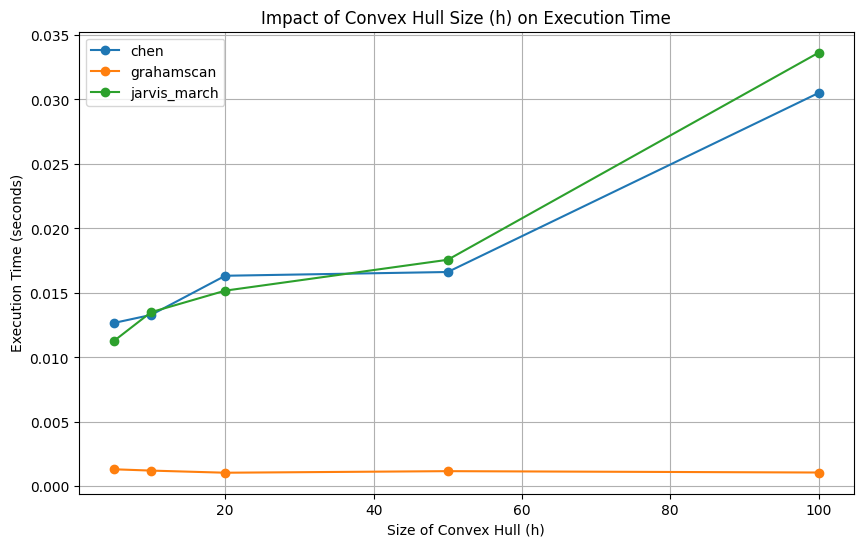

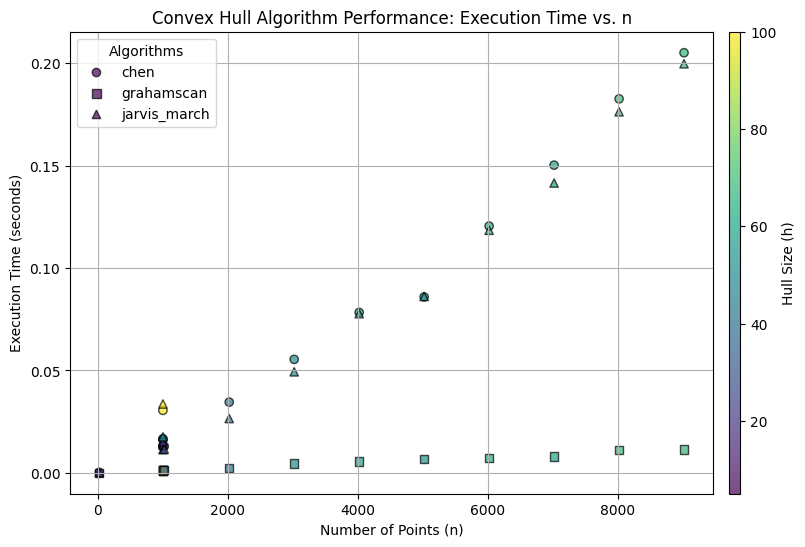

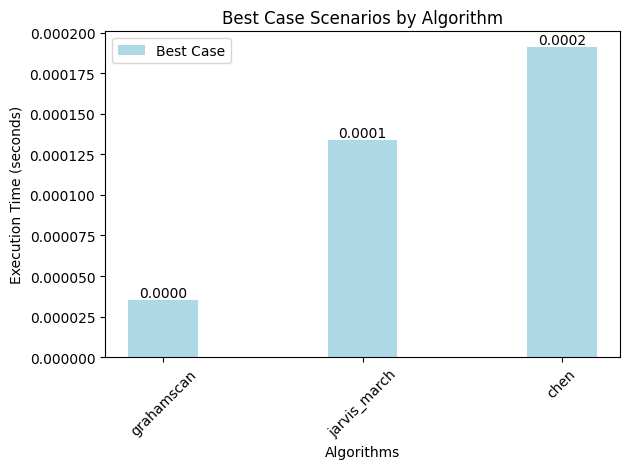

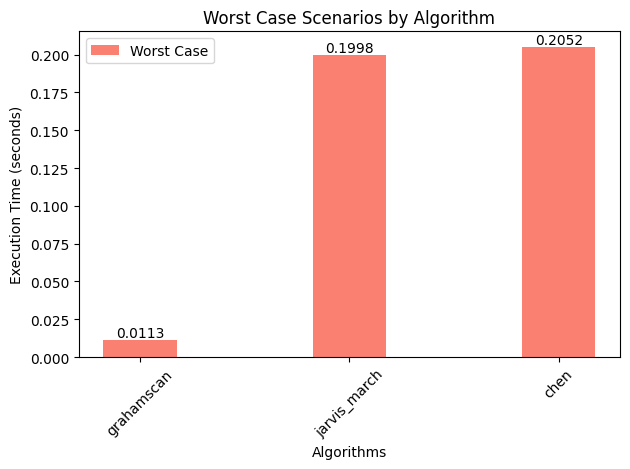

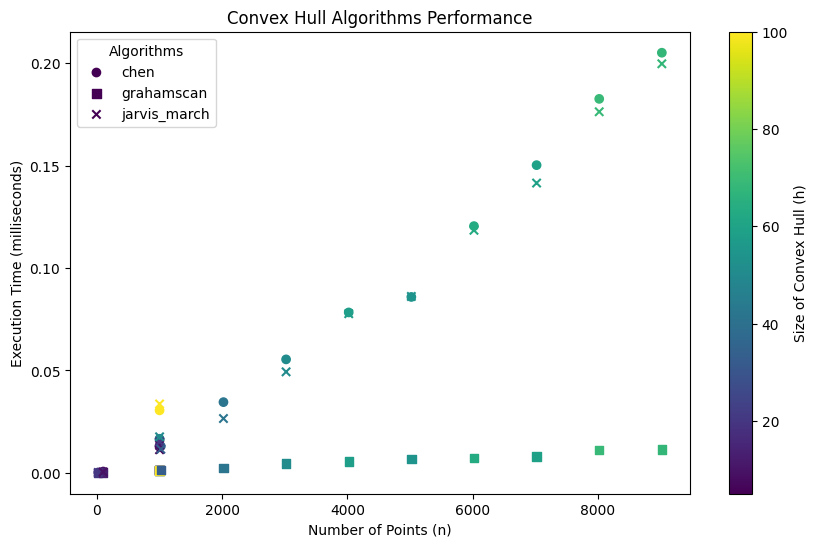

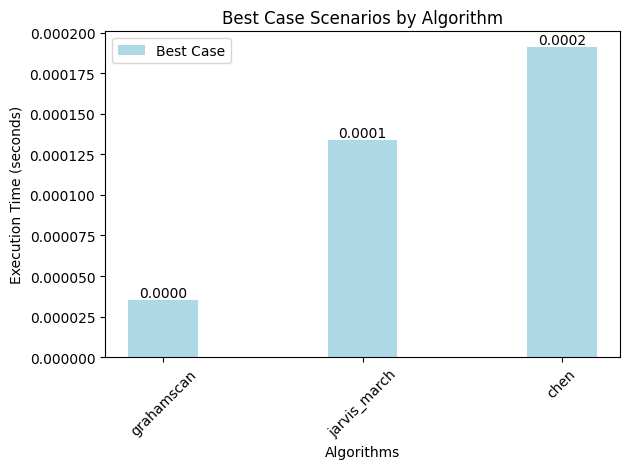

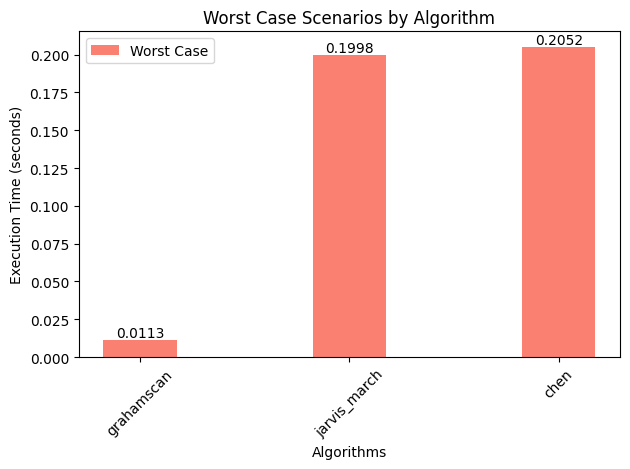

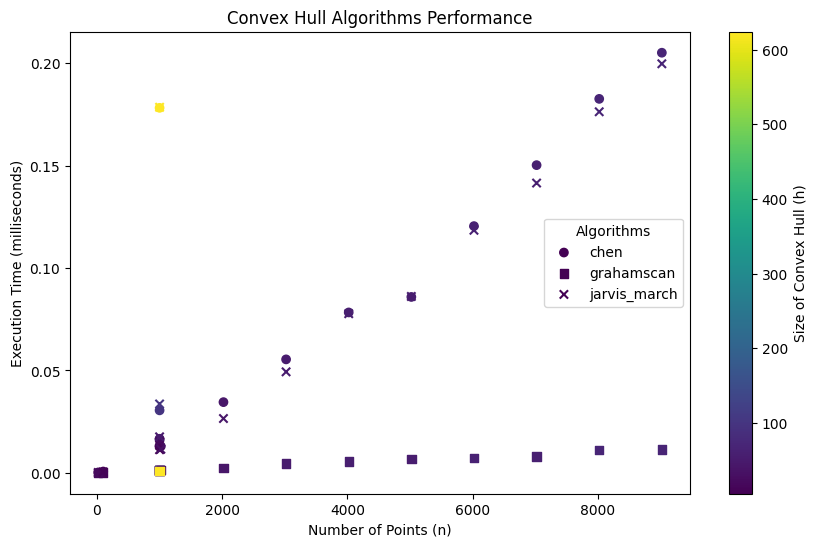

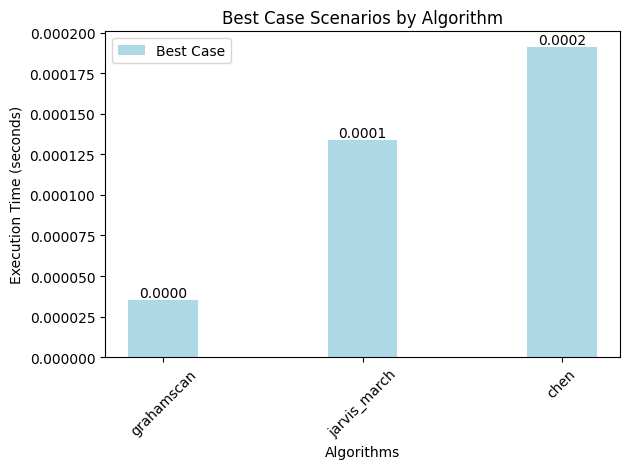

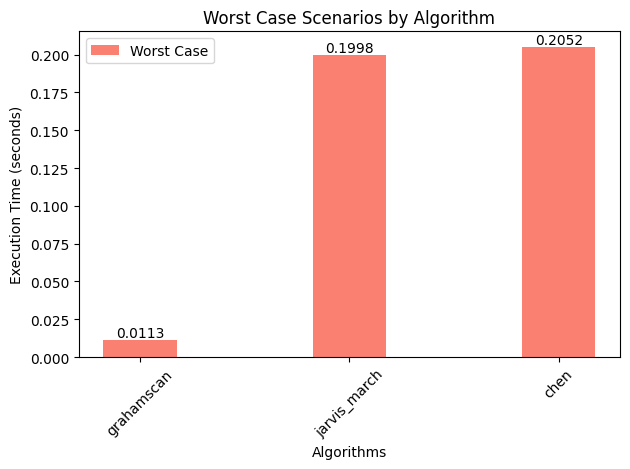

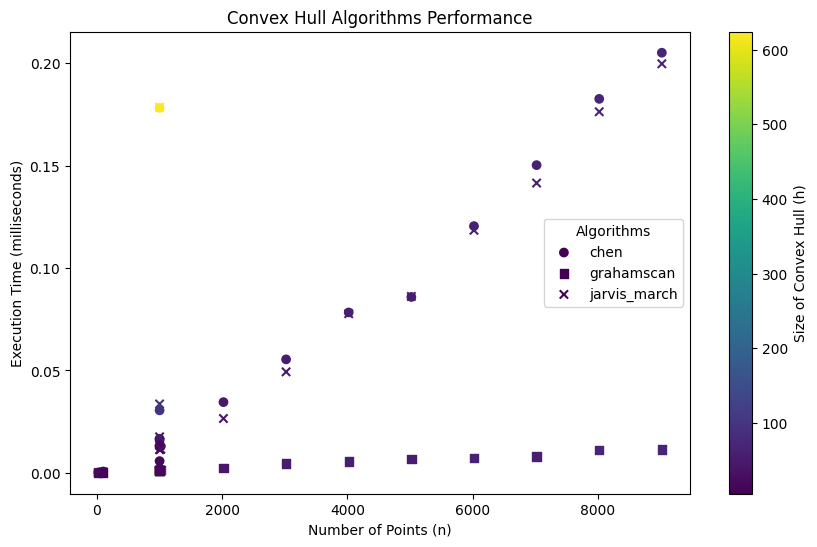

In [6]:
algorithms = {
    'Graham Scan': grahamscan,
    'Jarvis March': jarvis_march,
    'Chan': chen
}

framework = ExperimentalFramework(algorithms=[grahamscan, jarvis_march, chen], data_generator=TestDataGenerator())

#h
framework.run_experiment_for_h(n=1000, h_values=[5, 10, 20, 50, 100])
framework.plot_results_h()

#n and h r/s
framework.run_experiment_varying_n(h=20, max_n=10000, step=1000)
framework.plot_results_by_n_and_h()

#collinear
framework.run_experiment(n=100, distribution='collinear')
framework.plot_best_worst_cases()
framework.plot_results()

#circle
framework.run_experiment(n=1000, distribution='circle')
framework.plot_best_worst_cases()
framework.plot_results()

#cluster
framework.run_experiment(n=1000, distribution='cluster')
framework.plot_best_worst_cases()
framework.plot_results()


